## Tarea 8.2

Gabriel Pichihueche

Escriba un código similar a la interpolación lineal de la clase, pero que realice una interpolación cuadrática. Es decir, este código interpola usando una parábola para cada trío de puntos. Grafique sus resultados para el mismo ejemplo usado en la interpolación lineal.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

En este caso para resolver este ejercicio tenemos que añadir el tercer punto a la función de interpolación al momento de calcular los polinomios de Lagrange, además de agregar los elementos faltantes de la productoria, siguiendo la forma vista en clases:

Dados $n+1$ puntos, hay un único polinomio de grado $n$ que pasa por todos esos puntos. Ese polinomio está dado por:

$$
P(x) = \sum_{i = 0}^n f(x_i) L_{n,i}(x)\,,
$$

donde

$$
L_{n,i}(x) = \prod_{j = 0, j \neq i}^n \frac{(x - x_j)}{(x_i - x_j)}
$$

Definimos nuestra función para encontrar los índices y la de interpolación cuadrática:

In [2]:
def find_index(x, puntos):
    for i in range(len(puntos)):
        if x < puntos[i,0] and i != 0:
            return i-1

def quadratic_interpolation(x, puntos):
    if x >= puntos[len(puntos)-1,0]:
        return puntos[len(puntos)-1,1]
    elif x <= puntos[0,0]:
        return puntos[0,1]
    
    i = find_index(x, puntos)
    
    #Calculamos los polinomios de Lagrange
    L0 = puntos[i-1][1]*(x-puntos[i][0])/(puntos[i-1][0]-puntos[i][0])\
                       *(x-puntos[i+1][0])/(puntos[i-1][0]-puntos[i+1][0])
    
    L1 = puntos[i][1]*(x-puntos[i+1][0])/(puntos[i][0]-puntos[i+1][0])\
                     *(x-puntos[i-1][0])/(puntos[i][0]-puntos[i-1][0])
    
    L2 = puntos[i+1][1]*(x-puntos[i-1][0])/(puntos[i+1][0]-puntos[i-1][0])\
                       *(x-puntos[i][0])/(puntos[i+1][0]-puntos[i][0])
    
    return L0+L1+L2

Finalmente lo aplicamos al ejemplo que se ultilizó en los apuntes y lo graficamos para comparar:

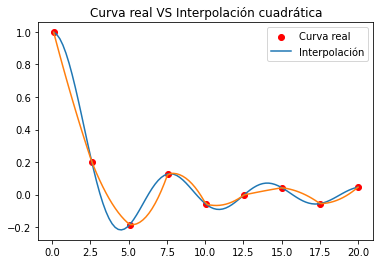

In [3]:
mini = 0.1
maxi = 20
order = 9

xp = np.linspace(mini, maxi, order)
puntos = np.array([[xi, np.sin(xi)/xi] for xi in xp])

x = np.linspace(mini, maxi, 100)
exact = np.sin(x)/x
quad = [quadratic_interpolation(xi, puntos) for xi in x]

plt.scatter(puntos[:,0], puntos[:,1], color='red')
plt.plot(x, exact)
plt.plot(x, quad)
plt.title("Curva real VS Interpolación cuadrática")
plt.legend(["Curva real","Interpolación"])
plt.show()

Se puede ver que esta aproximación es ligeramente mejor que la lineal vista en clase, aún así se nota que hay un grado de error considerable debido a la cantidad de puntos que se utilizan.

# Calificacion: 7.0